In [173]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

### <span style="color:#1E824C">Load Dataset</span>


In [174]:
dataset = r'..\data\fish_shellfish_dataset.csv'
df = pd.read_csv(dataset, header=0)

### <span style="color:#1E824C"> Inspect the data</span>
In this section I will inspect the dataset, to get a better understanding before cleaning it. 

The focus here, is to understand the looks of the dataset, checking for missing values or duplicated row and to get i look at the colmuns and ranges

In [175]:
# View first 5 rows
df.head()

,name,type,price_dk,season_availability,weight_g,length_cm,width_cm,height_cm,cost_dk,year,freight_charge
0,Aborre,fish,188.32,Spring,706.4,128.9,15.3,10.4,133.03,2021,2.60
1,Blåmusling,shellfish,202.72,Spring,2485.0,54.8,24.1,19.4,503.76,2021,1.50
2,Line_blåmusling,shellfish,73.92,Summer,3761.7,33.8,17.2,4.1,278.06,2021,2.07
3,Canadisk_hummer,shellfish,265.14,Spring,2639.3,57.7,24.8,6.0,699.78,2021,4.20
4,Dansk_10-armet_blæksprutte,fish,169.26,Spring,2812.6,95.1,35.9,29.5,476.06,2021,3.32


In [176]:
# View last 5 rows
df.tail()

,name,type,price_dk,season_availability,weight_g,length_cm,width_cm,height_cm,cost_dk,year,freight_charge
220,Sort_hummer,shellfish,101.21,Winter,3308.4,41.7,9.1,15.0,334.84,2025,2.29
221,Stenbider,fish,58.96,Autumn,3436.6,108.3,11.3,11.6,202.62,2025,4.64
222,Torsk,fish,275.41,Winter,4420.2,145.7,38.5,11.1,1217.37,2025,3.86
223,Ørred,fish,218.06,Summer,2372.6,84.9,23.3,14.3,517.37,2025,2.58
224,Østers,fish,249.65,Autumn,3629.1,143.2,2.3,29.0,906.00,2025,4.48


In [177]:
# Returns the number of rows and columns
df.shape

(225, 11)

In [178]:
# Shows all column names
df.columns

Index(['name', 'type', 'price_dk', 'season_availability', 'weight_g',
       'length_cm', 'width_cm', 'height_cm', 'cost_dk', 'year',
       'freight_charge'],
      dtype='object')

In [179]:
# 	Shows types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 225 non-null    object 
 1   type                 225 non-null    object 
 2   price_dk             225 non-null    float64
 3   season_availability  225 non-null    object 
 4   weight_g             225 non-null    float64
 5   length_cm            225 non-null    float64
 6   width_cm             225 non-null    float64
 7   height_cm            225 non-null    float64
 8   cost_dk              225 non-null    float64
 9   year                 225 non-null    int64  
 10  freight_charge       225 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 19.5+ KB


In [180]:
# Show count, mean, std, min, max (numeric only by default)
df.describe()

,price_dk,weight_g,length_cm,width_cm,height_cm,cost_dk,year,freight_charge
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,167.486444,2530.842222,79.568444,19.980444,15.655111,432.692978,2023.000000,3.273511
std,74.265985,1404.385360,41.610340,11.063868,8.240183,333.814721,1.417367,1.100139
min,32.870000,103.300000,10.100000,2.200000,1.100000,7.300000,2021.000000,1.310000
25%,101.880000,1258.700000,45.200000,9.700000,8.800000,162.610000,2022.000000,2.350000
50%,168.600000,2534.300000,80.500000,20.000000,16.000000,365.690000,2023.000000,3.320000
75%,236.460000,3761.700000,116.800000,29.400000,22.900000,611.730000,2024.000000,4.200000
max,298.840000,4993.000000,149.400000,39.900000,30.000000,1322.230000,2025.000000,5.220000


In [181]:
# Shows missing values pr. column
df.isnull().sum()

name                   0
type                   0
price_dk               0
season_availability    0
weight_g               0
length_cm              0
width_cm               0
height_cm              0
cost_dk                0
year                   0
freight_charge         0
dtype: int64

In [182]:
# Count of unique entries pr. column
df.nunique()

name                    45
type                     2
price_dk               223
season_availability      5
weight_g               224
length_cm              210
width_cm               173
height_cm              162
cost_dk                224
year                     5
freight_charge         172
dtype: int64

In [183]:
# Count duplicate rows
df.duplicated().sum()

0

In [184]:
# See all column data types
df.dtypes

name                    object
type                    object
price_dk               float64
season_availability     object
weight_g               float64
length_cm              float64
width_cm               float64
height_cm              float64
cost_dk                float64
year                     int64
freight_charge         float64
dtype: object

### <span style="color:#1E824C"> Clean the data</span>
This section are focusing on cleaning the data by renaming confusing columns for clarity, add columns if needed and convert categorical columns to numeric varables, so that they can be used in machine learning algorithms.
This cleaning process ensures that the dataset is structured, consistent, and ready for further BI exploration and AI-based modeling. It forms the foundation for reliable insights and accurate predictions in the next phases of the project

### Transform the data
* Renaming and adding columnms 

In [185]:
df.rename(columns={'price_dk': 'price_kr', 'cost_dk': 'cost_kr', 'freight_charge': 'freight_charge_kr'}, inplace=True)

In [186]:
# Calculate the profit for each row:
df['profit_kr'] = df['price_kr'] - df['cost_kr']

In [187]:
df[['price_kr', 'cost_kr', 'profit_kr']].head()

,price_kr,cost_kr,profit_kr
0,188.32,133.03,55.29
1,202.72,503.76,-301.04
2,73.92,278.06,-204.14
3,265.14,699.78,-434.64
4,169.26,476.06,-306.80


In [188]:
print(df.columns.tolist())

['name', 'type', 'price_kr', 'season_availability', 'weight_g', 'length_cm', 'width_cm', 'height_cm', 'cost_kr', 'year', 'freight_charge_kr', 'profit_kr']


#### Convert data types
* name
* type
* season_availability

In [189]:
# Convert each category into new binary
df = pd.get_dummies(df, columns=['name', 'type', 'season_availability'], drop_first=True)

### <span style="color:#1E824C"> Data Exploration & Visualizations</span>
In this section, I will explore the dataset to better understand its structure and identify patterns that could influence pricing and profitability. I will calculate descriptive statistics for the numeric data to get an overview of central tendencies, variability, and possible anomalies. I will then create targeted visualizations to support our exploration to get insights in which features to include in future predictive models and BI dashboards.

In [190]:
dependent = 'price_kr'
all_independent = [col for col in df.columns if col not in ['price_kr']]
print("All Independent variables:")
all_independent

All Independent variables:


['weight_g',
 'length_cm',
 'width_cm',
 'height_cm',
 'cost_kr',
 'year',
 'freight_charge_kr',
 'profit_kr',
 'name_Blåmusling',
 'name_Canadisk_hummer',
 'name_Dansk_10-armet_blæksprutte',
 'name_Fjordreje',
 'name_Fjæsing',
 'name_Flodkrebs',
 'name_Gedde',
 'name_Havkat',
 'name_Havtaske',
 'name_Helleflynder',
 'name_Helt',
 'name_Hornfisk',
 'name_Hvilling',
 'name_Ising',
 'name_Jomfruhummer',
 'name_Knude',
 'name_Knurhane',
 'name_Kuller',
 'name_Kulmule',
 'name_Laks_vild',
 'name_Lange',
 'name_Levende_norsk_kongekrabbe',
 'name_Line_blåmusling',
 'name_Lyssej',
 'name_Makrel',
 'name_Multe',
 'name_Mørksej',
 'name_Nordsøreje',
 'name_Norske_kammusling_i_skal',
 'name_Pighvar',
 'name_Rødspætte',
 'name_Rødtunge',
 'name_Sandart',
 'name_Signalkrebs',
 'name_Sild',
 'name_Skrubbe',
 'name_Skærising',
 'name_Slethvar',
 'name_Smelt',
 'name_Sort_hummer',
 'name_Stenbider',
 'name_Torsk',
 'name_Ørred',
 'name_Østers',
 'type_shellfish',
 'season_availability_Autumn',
 'seas

#### Visualize features
* Price vs Weight
* Price vs Freight charge
* Profit by season
* Price by Year
* Correlation Matrix
* Correlation Heatmap 
    1. Factors That Influence Price
    2. Factors That Influence Profitability

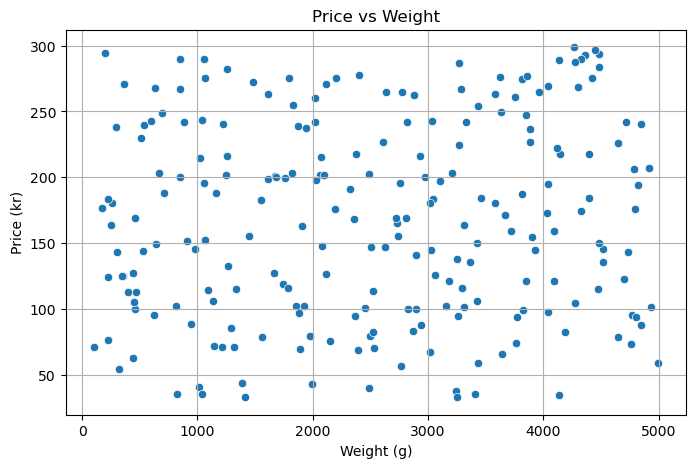

In [191]:
# Price vs Weight
plt.figure(figsize=(8, 5))
sbn.scatterplot(data=df, x='weight_g', y='price_kr')
plt.title('Price vs Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Price (kr)')
plt.grid(True)
plt.show()

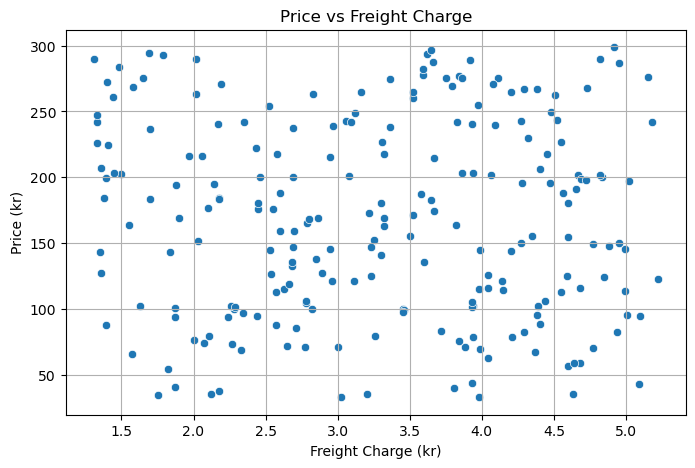

In [192]:
# Price vs Freight Charge
plt.figure(figsize=(8, 5))
sbn.scatterplot(data=df, x='freight_charge_kr', y='price_kr')
plt.title('Price vs Freight Charge')
plt.xlabel('Freight Charge (kr)')
plt.ylabel('Price (kr)')
plt.grid(True)
plt.show()

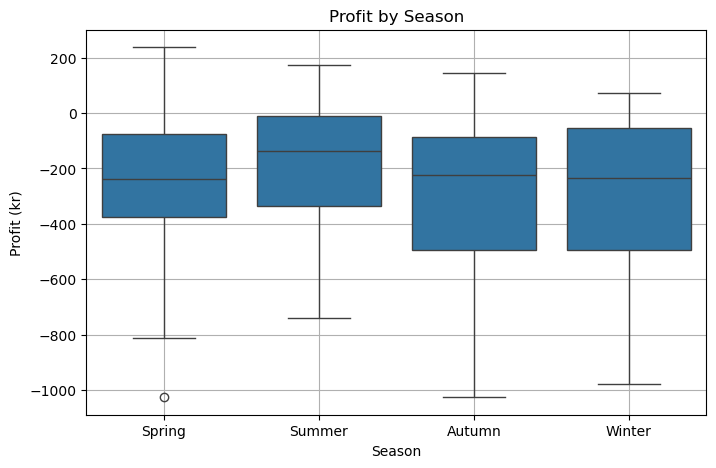

In [193]:
# Profit by Season
season_cols = ['season_availability_Autumn', 'season_availability_Spring', 'season_availability_Summer', 'season_availability_Winter']
df['season'] = df[season_cols].idxmax(axis=1).str.replace('season_availability_', '')

plt.figure(figsize=(8, 5))
sbn.boxplot(data=df, x='season', y='profit_kr')
plt.title('Profit by Season')
plt.xlabel('Season')
plt.ylabel('Profit (kr)')
plt.grid(True)
plt.show()

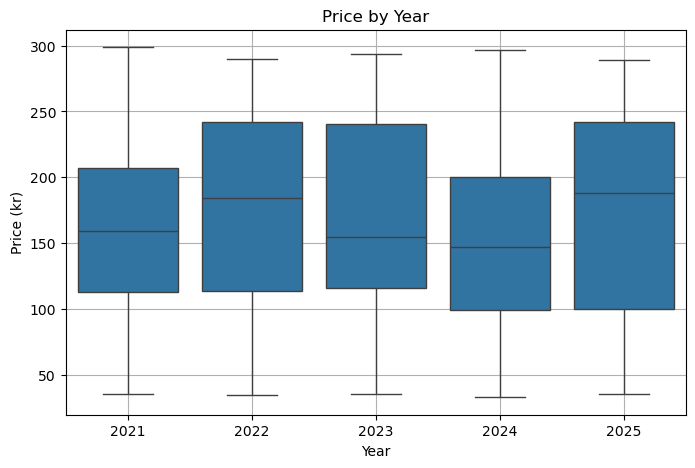

In [194]:
# Price by Year
plt.figure(figsize=(8, 5))
sbn.boxplot(data=df, x='year', y='price_kr')
plt.title('Price by Year')
plt.xlabel('Year')
plt.ylabel('Price (kr)')
plt.grid(True)
plt.show()

In [195]:
# Correlation Heatmap 1
cols_price_focus = [
    'price_kr', 'weight_g', 'length_cm', 'width_cm', 'height_cm',
    'freight_charge_kr', 'year',
    'season_availability_Autumn', 'season_availability_Spring',
    'season_availability_Summer', 'season_availability_Winter'
]


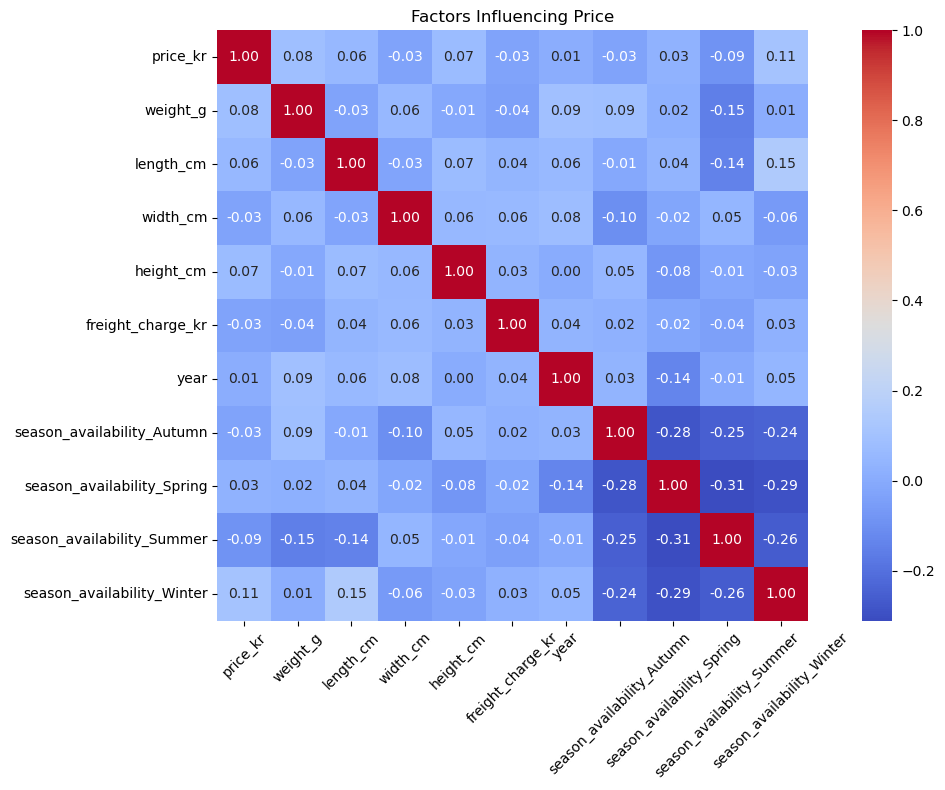

In [196]:
plt.figure(figsize=(12, 8))
sbn.heatmap(df[cols_price_focus].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Factors Influencing Price')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [197]:
# Correlation Heatmap 2
cols_profit_focus = [
    'profit_kr', 'price_kr', 'cost_kr',
    'freight_charge_kr', 'weight_g', 'year',
    'season_availability_Autumn', 'season_availability_Spring',
    'season_availability_Summer', 'season_availability_Winter'
]


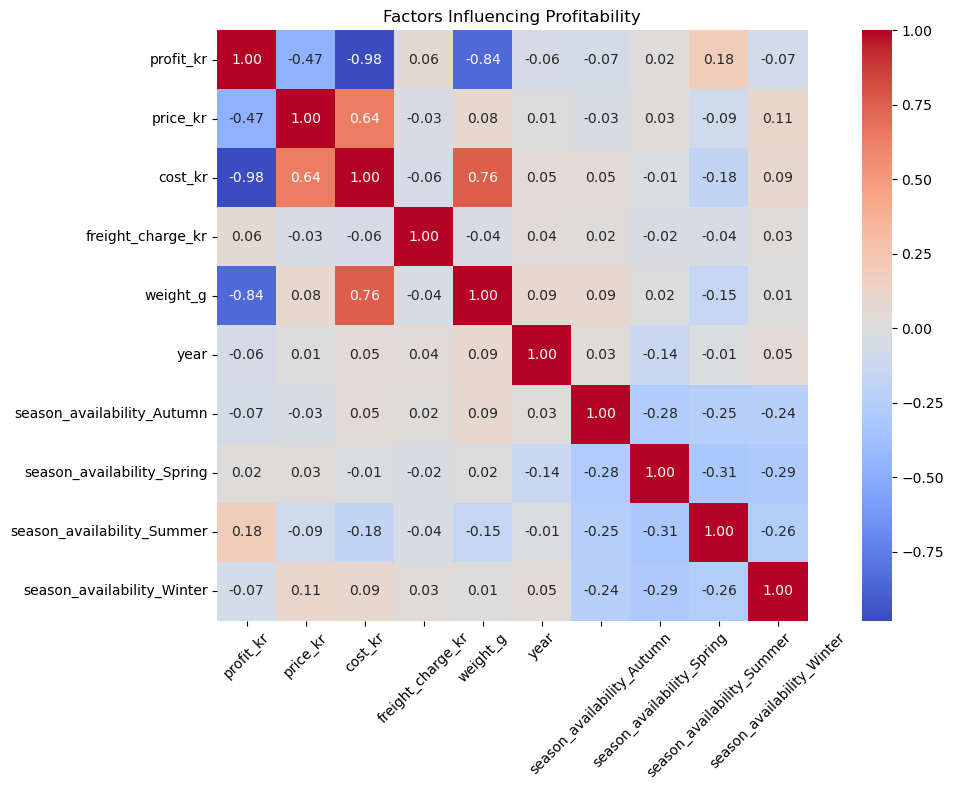

In [198]:
plt.figure(figsize=(12, 8))
sbn.heatmap(df[cols_profit_focus].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Factors Influencing Profitability')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Check the distribution of the values of the attributes
* price_kr
* cost_kr
* weight_g
* length_cm
* width_cm
* height_cm
* freight_charge_kr

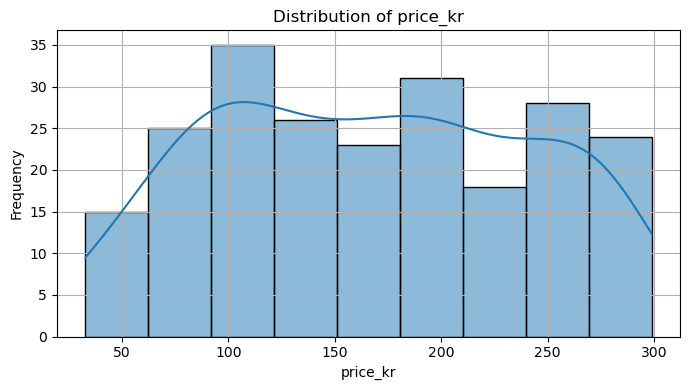

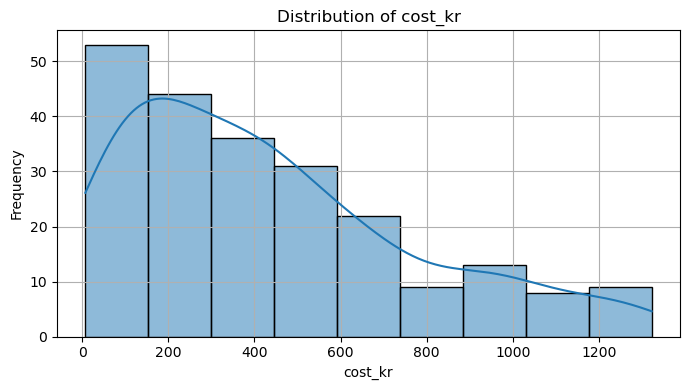

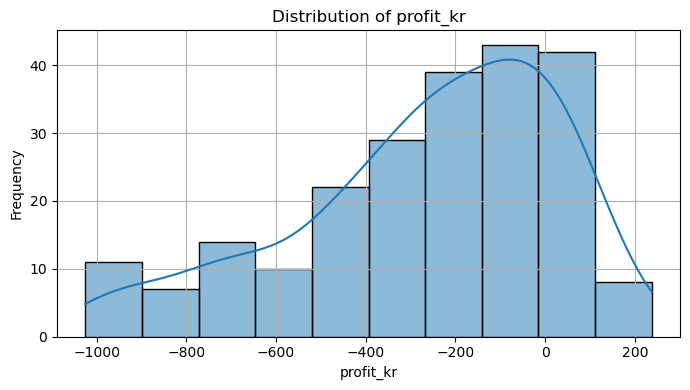

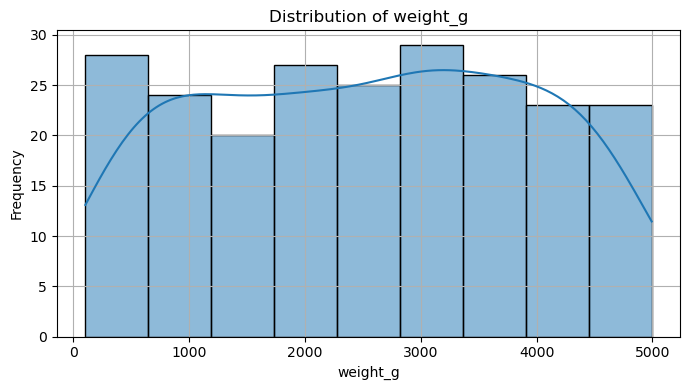

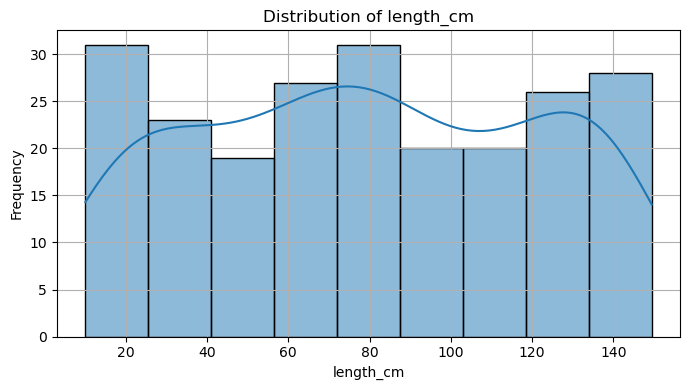

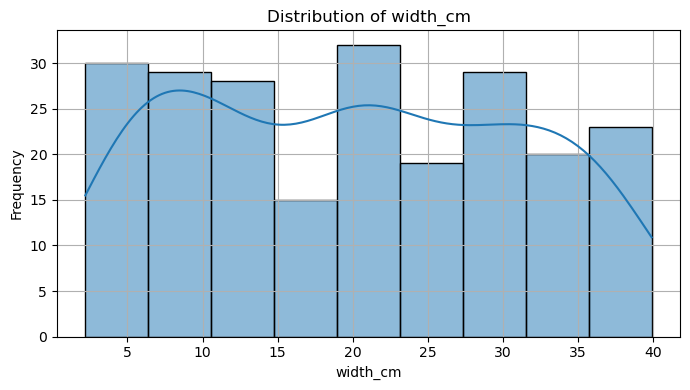

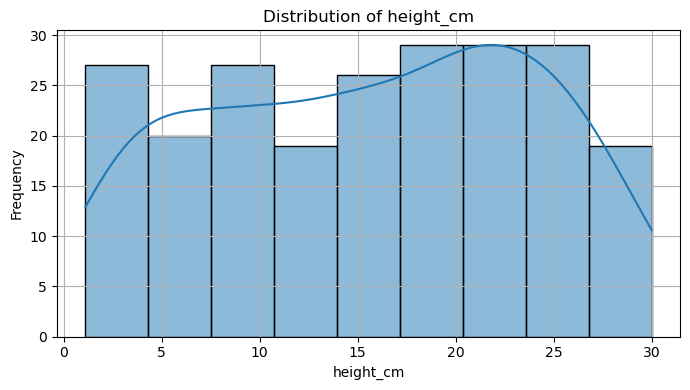

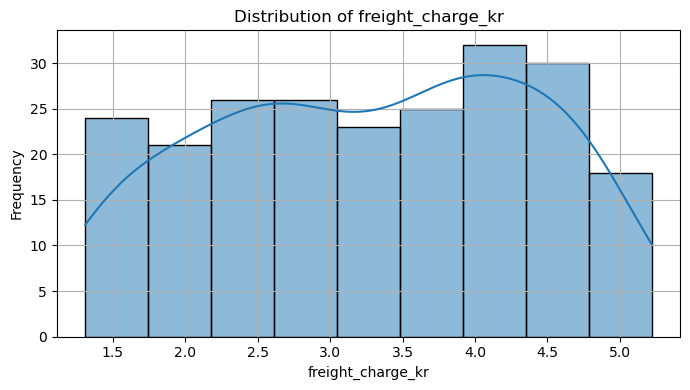

In [199]:
cols = ['price_kr', 'cost_kr', 'profit_kr', 'weight_g', 'length_cm', 'width_cm', 'height_cm', 'freight_charge_kr']

for col in cols:
    plt.figure(figsize=(7, 4))
    sbn.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Handle outliers

In [200]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        # Filter out rows where the column value is outside bounds
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [201]:
df = remove_outliers_iqr(df, cols)

In [202]:
print("Cleaned DataFrame shape:", df.shape)


Cleaned DataFrame shape: (223, 59)


#### Scale the data

In [203]:
scaler = StandardScaler()

scale_cols = ['weight_g', 'length_cm', 'width_cm', 'height_cm', 
              'freight_charge_kr', 'cost_kr', 'profit_kr']

df[scale_cols] = scaler.fit_transform(df[scale_cols])

### <span style="color:#1E824C"> Save the cleaned dataset </span>

In [204]:
#df.to_csv('data/cleaned_fish_shellfish_dataset.csv', index=False)


###  <span style="color:#1E824C"> Summary </span>
- Loaded and cleaned seafood dataset
- Renamed, transformed, and engineered features 
- Removed outliers using IQR
- Created visualizations for BI exploration
- Prepared dataset for modeling by converting to numeric format
- Saved cleaned dataset for next sprint